In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-11-13,13,11,2020,360,14,Afghanistan,AF,AFG,38041757.0,Asia,4.471402
1,2020-11-12,12,11,2020,146,4,Afghanistan,AF,AFG,38041757.0,Asia,3.848403
2,2020-11-11,11,11,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,3.464614
3,2020-11-10,10,11,2020,224,12,Afghanistan,AF,AFG,38041757.0,Asia,3.761656
4,2020-11-09,9,11,2020,80,3,Afghanistan,AF,AFG,38041757.0,Asia,3.695939


In [3]:
select = df['countriesAndTerritories']=='Iran'
select.sum()

319

In [4]:
df_iran = df.loc[select, :].sort_values(by='dateRep').set_index('dateRep')#.reset_index(drop=True)
df_iran.head()

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
2020-01-01,1,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
2020-01-02,2,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
2020-01-03,3,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
2020-01-04,4,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN


/Users/User/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


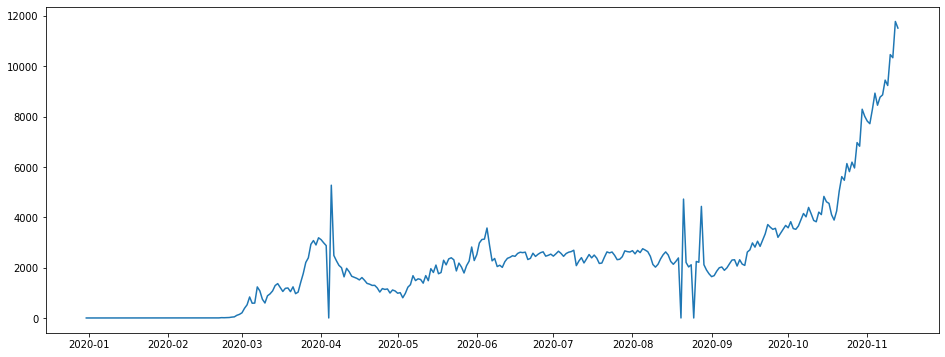

In [5]:
plt.figure(figsize=(16, 6))
plt.plot(df_iran.loc[:, 'cases'])

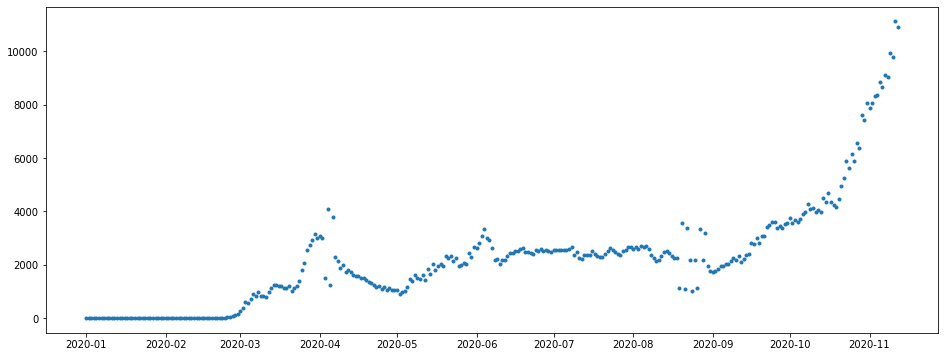

In [6]:
df_iran['expected_cases'] = (df_iran['cases'].shift(-1)+df_iran['cases'].shift(1))/2
plt.figure(figsize=(16, 6))
plt.plot(df_iran.loc[:, 'expected_cases'], '.')

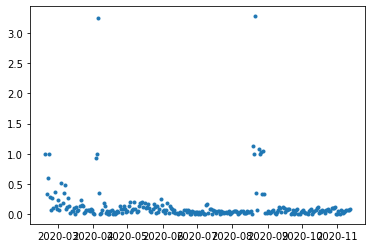

In [7]:
plt.plot(np.abs((df_iran.loc[:, 'cases']-df_iran.loc[:, 'expected_cases'])/df_iran.loc[:, 'expected_cases']), '.')

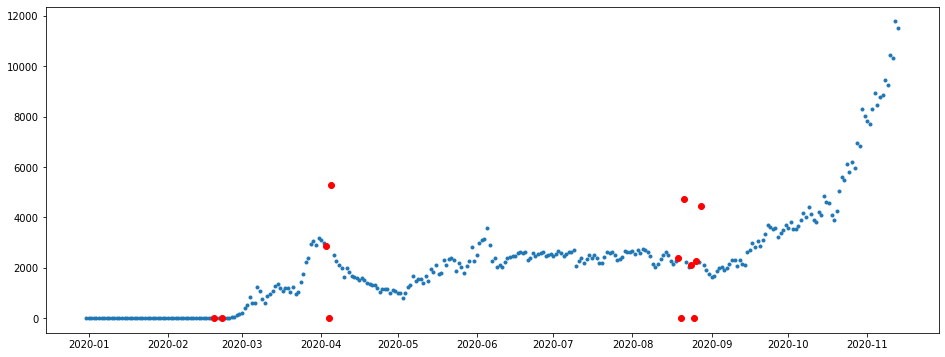

In [8]:
is_outlier = np.abs((df_iran.loc[:, 'cases']-df_iran.loc[:, 'expected_cases'])/df_iran.loc[:, 'expected_cases'])>0.7
plt.figure(figsize=(16, 6))
plt.plot(df_iran.loc[:, 'cases'], '.')
plt.plot(df_iran.loc[is_outlier, 'cases'], 'or')

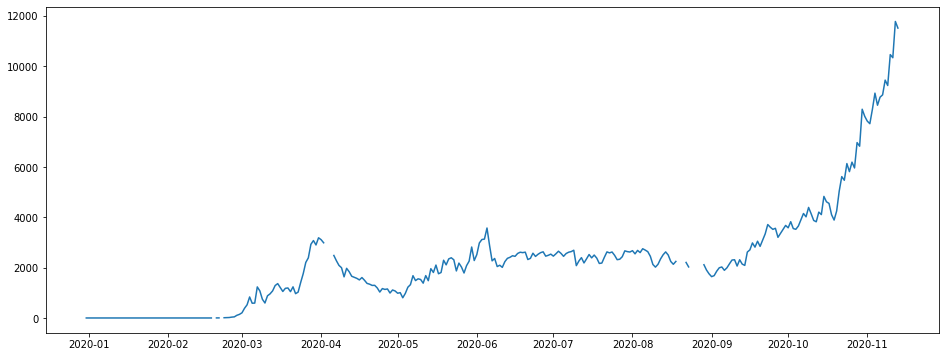

In [9]:
df_iran.loc[is_outlier, 'cases'] = np.nan
plt.figure(figsize=(16, 6))
plt.plot(df_iran.loc[:, 'cases'])

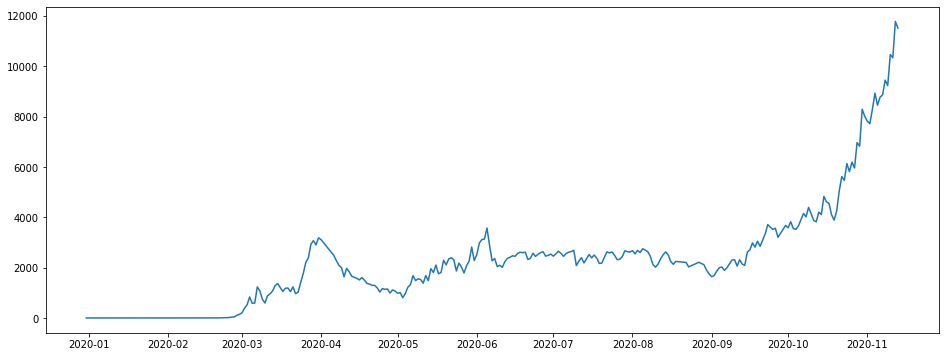

In [10]:
plt.figure(figsize=(16, 6))
plt.plot(df_iran.loc[:, 'cases'].interpolate(method='linear'))